*This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur.
The content is availabe [on GitHub](https://github.com/asabenhur/CS345).*

*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

<img style="padding: 10px; float:right;" alt="CC-BY-SA icon.svg in public domain" src="https://upload.wikimedia.org/wikipedia/commons/d/d0/CC-BY-SA_icon.svg" width="125">

<a href="https://colab.research.google.com/github//asabenhur/CS345/blob/master/notebooks/module02_01_hyperplanes.ipynb">
  <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [13]:
import numpy as np
from matplotlib import pyplot as plt
%autosave 0

Autosave disabled


In [22]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']=150

# Hyperplanes

Hyperplanes are a key mathematical object that is at the heart of many machine learning classification methods.
The hyperplane is a generalization to higher dimensions
of a line (two dimensions) or of a plane (three dimensions).

A hyperplane is the set of vectors $\mathbf{x}$ is satisfy

$$
\mathbf{w}^\top \mathbf{x} + b = 0,
$$

where $\mathbf{w}$ is a fixed vector, called the *weight vector* and $b$ is a scalar value called the *bias*.

#### Example:  hyperplanes in two dimensions

In two dimensions a hyperplane has the form:

$$
w_1 x_1 + w_2 x_2 + b = 0
$$

This can be expressed as:

$$
x_2 = - \frac{w_1}{w_2} x_1 - \frac{b}{w_2},
$$

which is the familiar expression for a line.

### Hyperplanes with $b = 0$

To understand hyperplanes better, we'll start with the case $b=0$, i.e.

$$
\mathbf{w}^\top \mathbf{x} = 0.
$$

As we have seen previously, the dot product between two vectors is given by:

$$
\mathbf{w}^\top \mathbf{x} = ||\mathbf{w}|| \; ||\mathbf{x}|| \cos(\theta),
$$

where $\theta$ is the angle between the two vectors.
This implies that a hyperplane defined by the equation $\mathbf{w}^\top \mathbf{x}=0$ is *the set of all vectors* $\mathbf{x}$ *that are orthogonal to* $\mathbf{w}$.

We demonstrate this using the figure below:


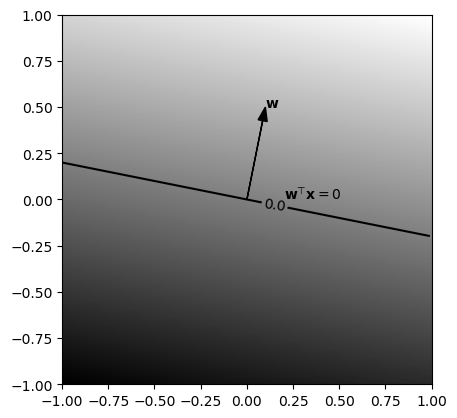

In [30]:
w = np.array([0.1, 0.5])

# setting up the grid
delta = 0.01
xmin=-1;xmax=1;ymin=-1;ymax=1
xs = np.arange(xmin, xmax, delta)
ys = np.arange(ymin, ymax, delta)
x_grid, y_grid = np.meshgrid(xs, ys)

# the value produced by the hyperplane at each point of the grid
Z = w[0] * x_grid + w[1] * y_grid

#plt.figure(figsize=(3,3))

im = plt.imshow(Z, interpolation='bilinear', origin='lower',
                cmap=plt.cm.gray, extent=(xmin,xmax,ymin,ymax) )

C = plt.contour(x_grid, y_grid, Z, 1, origin='lower',
                colors = 'black')

plt.clabel(C, inline=1, fmt='%1.1f')
 
plt.arrow(0,0,w[0],w[1], width=0.001,head_width=0.05, length_includes_head=True, alpha=1,linestyle='-',color='k');
plt.text(w[0], w[1], r"$\mathbf{w}$");
plt.text(0.2, 0, r"$\mathbf{w}^\top \mathbf{x} = 0$");


The line defined by the equation $\mathbf{w}^\top \mathbf{x} = 0$ divides the plane into two halves, depending of the angle between $\mathbf{x}$ and $\mathbf{w}$:

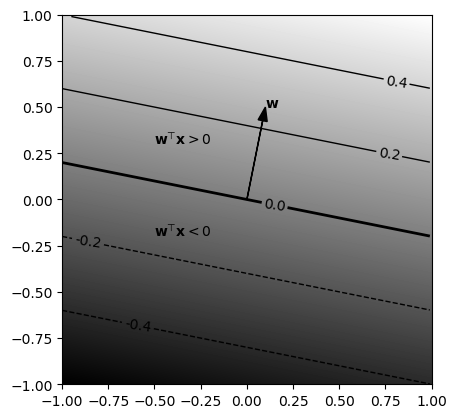

In [36]:
w = np.array([0.1, 0.5])

# setting up the grid
delta = 0.01
xmin=-1;xmax=1;ymin=-1;ymax=1
xs = np.arange(xmin, xmax, delta)
ys = np.arange(ymin, ymax, delta)
x_grid, y_grid = np.meshgrid(xs, ys)

Z = w[0] * x_grid + w[1] * y_grid

#plt.figure(figsize=(3.2,3.2))
im = plt.imshow(Z, interpolation='bilinear', origin='lower',
                cmap=plt.cm.gray, extent=(xmin,xmax,ymin,ymax) )

C = plt.contour(x_grid, y_grid, Z, 5, 
                origin='lower',
                linewidths=(1,1,1,2,1,1,1),
                colors = 'black')

plt.clabel(C, inline=1, fmt='%1.1f')
 
plt.arrow(0,0,w[0],w[1], width=0.001,head_width=0.05, length_includes_head=True, alpha=1,linestyle='-',color='k');
plt.text(w[0], w[1], r"$\mathbf{w}$");
plt.text(-0.5, (0.1-w[0]*(-0.5))/w[1], r"$\mathbf{w}^\top\mathbf{x} > 0$");
plt.text(-0.5, (-0.15-w[0]*(-0.5))/w[1], r"$\mathbf{w}^\top\mathbf{x} < 0$");


### Question

* What can you say about the angle between $\mathbf{w}$ and $\mathbf{x}$ when $\mathbf{w}^\top \mathbf{x} > 0$?  When $\mathbf{w}^\top \mathbf{x} < 0$?

### Hyperplane with a nonzero bias

The case $b\neq0$ is similar, except that the hyperplane no longer passes through the origin as demonstrated in the next figure:

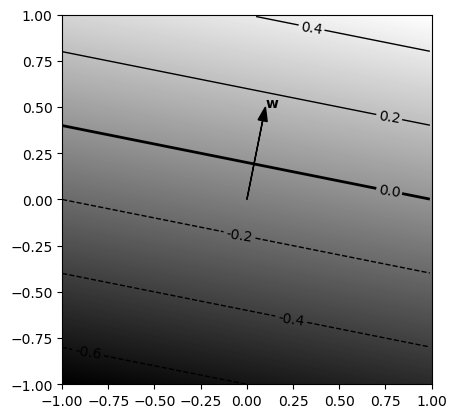

In [32]:
import numpy as np
from matplotlib import pyplot as plt

w = np.array([0.1, 0.5])
b = -0.1

# setting up the grid
delta = 0.01
xmin=-1;xmax=1;ymin=-1;ymax=1
xs = np.arange(xmin, xmax, delta)
ys = np.arange(ymin, ymax, delta)
x_grid, y_grid = np.meshgrid(xs, ys)

Z = w[0] * x_grid + w[1] * y_grid + b
   
#plt.figure(figsize=(3,3))    
im = plt.imshow(Z, interpolation='bilinear', origin='lower',
                cmap=plt.cm.gray, extent=(xmin,xmax,ymin,ymax) )

C = plt.contour(x_grid, y_grid, Z, 5, 
                origin='lower',
                linewidths=(1,1,1,1,2,1,1),
                colors = 'black')

plt.clabel(C, inline=1, fmt='%1.1f')
 
plt.arrow(0,0,w[0],w[1], width=0.001,head_width=0.05, length_includes_head=True, alpha=1,linestyle='-',color='k');
plt.text(w[0], w[1], r"$\mathbf{w}$");


The story in higher dimension is much the same.
In a $d$-dimensional vector space, a hyperplane has $d-1$ dimensions
and divides the space into two half-spaces - exactly what we need for a binary classifier!
In this context, hyperplanes create a linear *decision boundary*.

## Hyperplanes for classification

Next, we'll demonstrate the usefulness of hyperplanes for data classification.
First let's create a labeled dataset in two dimensions:

In [27]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, class_sep=0.3, random_state=1)
X.shape, y.shape

((100, 2), (100,))

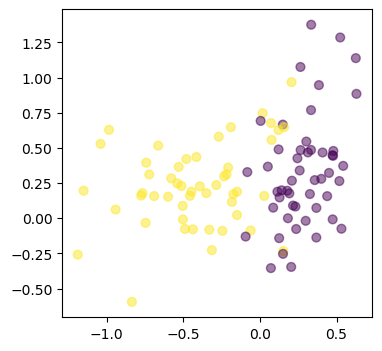

In [35]:
plt.figure(figsize=(4,4))
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5, s=40, cmap='viridis');

A hyperplane is a good way of classifying this data:

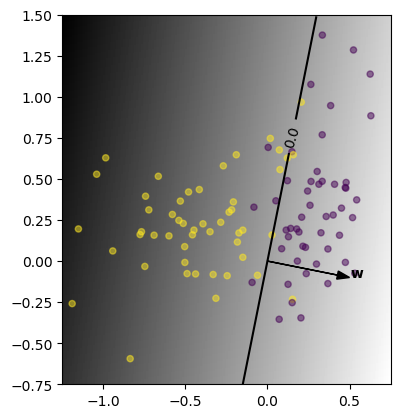

In [29]:
plt.style.use('default')
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5, s=20, cmap='viridis');

w = np.array([0.5, -0.1])
b = 0
delta = 0.01
xmin=-1.25;xmax=0.75;ymin=-0.75;ymax=1.5
xs = np.arange(xmin, xmax, delta)
ys = np.arange(ymin, ymax, delta)
x_grid, y_grid = np.meshgrid(xs, ys)

Z = w[0] * x_grid + w[1] * y_grid + b
    
im = plt.imshow(Z, origin='lower',
                cmap=plt.cm.gray, extent=(xmin,xmax,ymin,ymax) )

C = plt.contour(x_grid, y_grid, Z, 1, origin='lower',
                colors = 'black')

plt.clabel(C, fmt='%1.1f')

plt.arrow(0,0,w[0],w[1], width=0.001,head_width=0.05, length_includes_head=True, alpha=1,linestyle='-',color='k');
plt.text(w[0], w[1], r"$\mathbf{w}$");


### Exercise

* In this exercise we will focus on hyperplanes with $b=0$.  Let $\mathbf{w}$ and $\mathbf{w}'$ be weight vectors such that
$\mathbf{w}' = a \mathbf{w}$, where $a$ is a positive number.
What can you say about the decision boundary of these two hyperplanes?


## Summary

* Hyperplanes are high-dimensional generalizations of lines and planes.  They can be used to define decision boundaries and are one of the most useful techniques for classification tasks.
